In [1]:
from __future__ import absolute_import, division, print_function
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

print(tf.__version__)

1.8.0


Using TensorFlow backend.


## 加载数据

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Administrator\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()


## 探索数据

In [4]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## 数据清洗

In [6]:
dataset.isna().sum(axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum(axis=0)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
origin = dataset.pop('Origin')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [10]:
origin

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     3
15     1
16     1
17     1
18     3
19     2
20     2
21     2
22     2
23     2
24     1
25     1
26     1
27     1
28     1
29     3
      ..
367    1
368    1
369    1
370    1
371    1
372    1
373    1
375    2
376    3
377    3
378    1
379    1
380    3
381    3
382    3
383    3
384    3
385    3
386    1
387    1
388    1
389    1
390    3
391    1
392    1
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

### 编码

In [11]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### 分割数据集

In [12]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

## 数据分析

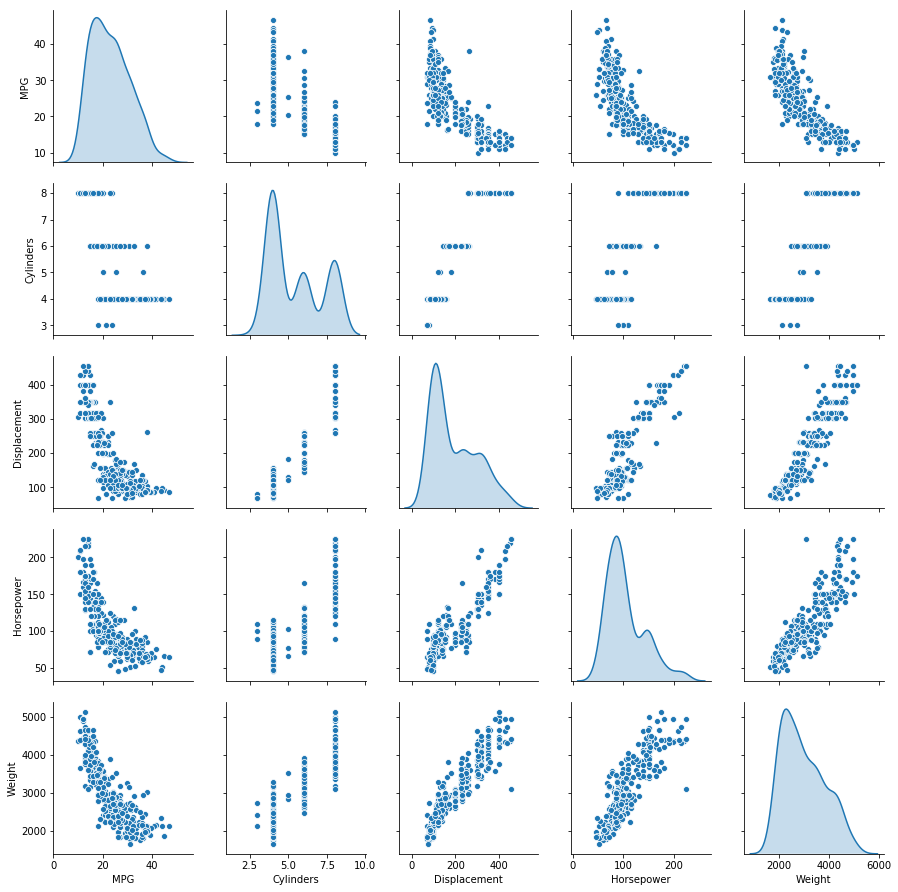

In [13]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Horsepower','Weight']], diag_kind="kde")

In [14]:
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [15]:
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [16]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


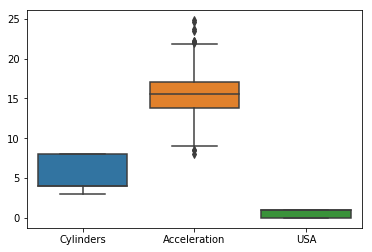

In [17]:
sns.boxplot(data = dataset.loc[:, ['Cylinders','Acceleration','USA']])

### 取出label

In [18]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### 标准化

In [19]:
def norm(x):
      return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [20]:
normed_test_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.465148,-0.495225
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,-0.465148,2.012852
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.465148,-0.495225


## 建立模型

In [21]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)]
)

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])
    
    model.summary()
    
    return model

In [22]:

model = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.1024277 ],
       [ 0.20789239],
       [ 0.10385931],
       [ 0.24592316],
       [-0.02611583],
       [ 0.16977924],
       [ 0.00559347],
       [ 0.04228868],
       [-0.00535283],
       [-0.3579888 ]], dtype=float32)

## 模型训练

In [24]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')    
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.1,
)

Train on 282 samples, validate on 32 samples
Epoch 1/1000
282/282 [==============================] - 0s 486us/step - loss: 562.3317 - mean_absolute_error: 22.4825 - mean_squared_error: 562.3317 - val_loss: 530.6835 - val_mean_absolute_error: 21.4721 - val_mean_squared_error: 530.6835
Epoch 2/1000
282/282 [==============================] - 0s 99us/step - loss: 499.1408 - mean_absolute_error: 21.0964 - mean_squared_error: 499.1408 - val_loss: 464.8829 - val_mean_absolute_error: 19.9878 - val_mean_squared_error: 464.8829
Epoch 3/1000
282/282 [==============================] - 0s 99us/step - loss: 434.3084 - mean_absolute_error: 19.6054 - mean_squared_error: 434.3084 - val_loss: 393.8380 - val_mean_absolute_error: 18.2467 - val_mean_squared_error: 393.8380
Epoch 4/1000
282/282 [==============================] - 0s 106us/step - loss: 365.0309 - mean_absolute_error: 17.8474 - mean_squared_error: 365.0309 - val_loss: 318.8015 - val_mean_absolute_error: 16.2381 - val_mean_squared_error: 318.80

Epoch 36/1000
282/282 [==============================] - 0s 103us/step - loss: 7.5472 - mean_absolute_error: 1.9827 - mean_squared_error: 7.5472 - val_loss: 7.8042 - val_mean_absolute_error: 2.1619 - val_mean_squared_error: 7.8042
Epoch 37/1000
282/282 [==============================] - 0s 106us/step - loss: 7.2611 - mean_absolute_error: 1.9391 - mean_squared_error: 7.2611 - val_loss: 7.8858 - val_mean_absolute_error: 2.2023 - val_mean_squared_error: 7.8858
Epoch 38/1000
282/282 [==============================] - 0s 96us/step - loss: 7.3549 - mean_absolute_error: 1.9402 - mean_squared_error: 7.3549 - val_loss: 7.3066 - val_mean_absolute_error: 2.0863 - val_mean_squared_error: 7.3066
Epoch 39/1000
282/282 [==============================] - 0s 99us/step - loss: 7.6128 - mean_absolute_error: 1.9579 - mean_squared_error: 7.6128 - val_loss: 7.7247 - val_mean_absolute_error: 2.1743 - val_mean_squared_error: 7.7247
Epoch 40/1000
282/282 [==============================] - 0s 103us/step - loss:

282/282 [==============================] - 0s 103us/step - loss: 6.2592 - mean_absolute_error: 1.8134 - mean_squared_error: 6.2592 - val_loss: 8.7108 - val_mean_absolute_error: 2.3010 - val_mean_squared_error: 8.7108
Epoch 72/1000
282/282 [==============================] - 0s 106us/step - loss: 6.4523 - mean_absolute_error: 1.7975 - mean_squared_error: 6.4523 - val_loss: 7.7999 - val_mean_absolute_error: 2.1623 - val_mean_squared_error: 7.7999
Epoch 73/1000
282/282 [==============================] - 0s 106us/step - loss: 6.4238 - mean_absolute_error: 1.8075 - mean_squared_error: 6.4238 - val_loss: 8.3447 - val_mean_absolute_error: 2.2182 - val_mean_squared_error: 8.3447
Epoch 74/1000
282/282 [==============================] - 0s 103us/step - loss: 6.2723 - mean_absolute_error: 1.7984 - mean_squared_error: 6.2723 - val_loss: 7.8449 - val_mean_absolute_error: 2.1420 - val_mean_squared_error: 7.8449
Epoch 75/1000
282/282 [==============================] - 0s 96us/step - loss: 6.4493 - mea

282/282 [==============================] - 0s 110us/step - loss: 6.0675 - mean_absolute_error: 1.7320 - mean_squared_error: 6.0675 - val_loss: 7.4333 - val_mean_absolute_error: 2.0575 - val_mean_squared_error: 7.4333
Epoch 107/1000
282/282 [==============================] - 0s 106us/step - loss: 5.8896 - mean_absolute_error: 1.7324 - mean_squared_error: 5.8896 - val_loss: 7.7569 - val_mean_absolute_error: 2.1875 - val_mean_squared_error: 7.7569
Epoch 108/1000
282/282 [==============================] - 0s 99us/step - loss: 6.0163 - mean_absolute_error: 1.7232 - mean_squared_error: 6.0163 - val_loss: 7.9624 - val_mean_absolute_error: 2.1803 - val_mean_squared_error: 7.9624
Epoch 109/1000
282/282 [==============================] - 0s 106us/step - loss: 5.9486 - mean_absolute_error: 1.7080 - mean_squared_error: 5.9486 - val_loss: 8.3420 - val_mean_absolute_error: 2.2061 - val_mean_squared_error: 8.3420
Epoch 110/1000
282/282 [==============================] - 0s 106us/step - loss: 6.0156 -

282/282 [==============================] - 0s 92us/step - loss: 5.8242 - mean_absolute_error: 1.6597 - mean_squared_error: 5.8242 - val_loss: 7.7275 - val_mean_absolute_error: 2.1253 - val_mean_squared_error: 7.7275
Epoch 142/1000
282/282 [==============================] - 0s 99us/step - loss: 5.8575 - mean_absolute_error: 1.6804 - mean_squared_error: 5.8575 - val_loss: 7.3002 - val_mean_absolute_error: 2.0722 - val_mean_squared_error: 7.3002
Epoch 143/1000
282/282 [==============================] - 0s 96us/step - loss: 5.9556 - mean_absolute_error: 1.6764 - mean_squared_error: 5.9556 - val_loss: 7.7859 - val_mean_absolute_error: 2.1392 - val_mean_squared_error: 7.7859
Epoch 144/1000
282/282 [==============================] - 0s 96us/step - loss: 5.6725 - mean_absolute_error: 1.6700 - mean_squared_error: 5.6725 - val_loss: 7.5338 - val_mean_absolute_error: 2.0939 - val_mean_squared_error: 7.5338
Epoch 145/1000
282/282 [==============================] - 0s 96us/step - loss: 5.6833 - mea

282/282 [==============================] - 0s 99us/step - loss: 5.6973 - mean_absolute_error: 1.6307 - mean_squared_error: 5.6973 - val_loss: 8.1612 - val_mean_absolute_error: 2.1609 - val_mean_squared_error: 8.1612
Epoch 177/1000
282/282 [==============================] - 0s 99us/step - loss: 5.6275 - mean_absolute_error: 1.6364 - mean_squared_error: 5.6275 - val_loss: 8.2221 - val_mean_absolute_error: 2.2099 - val_mean_squared_error: 8.2221
Epoch 178/1000
282/282 [==============================] - 0s 96us/step - loss: 5.4924 - mean_absolute_error: 1.6238 - mean_squared_error: 5.4924 - val_loss: 7.7170 - val_mean_absolute_error: 2.1103 - val_mean_squared_error: 7.7170
Epoch 179/1000
282/282 [==============================] - 0s 99us/step - loss: 5.5679 - mean_absolute_error: 1.6314 - mean_squared_error: 5.5679 - val_loss: 7.2902 - val_mean_absolute_error: 2.0584 - val_mean_squared_error: 7.2902
Epoch 180/1000
282/282 [==============================] - 0s 96us/step - loss: 5.4123 - mea

282/282 [==============================] - 0s 96us/step - loss: 5.3466 - mean_absolute_error: 1.6118 - mean_squared_error: 5.3466 - val_loss: 8.3574 - val_mean_absolute_error: 2.1899 - val_mean_squared_error: 8.3574
Epoch 212/1000
282/282 [==============================] - 0s 99us/step - loss: 5.3653 - mean_absolute_error: 1.5929 - mean_squared_error: 5.3653 - val_loss: 8.3399 - val_mean_absolute_error: 2.1852 - val_mean_squared_error: 8.3399
Epoch 213/1000
282/282 [==============================] - 0s 99us/step - loss: 5.3715 - mean_absolute_error: 1.5857 - mean_squared_error: 5.3715 - val_loss: 8.2032 - val_mean_absolute_error: 2.1807 - val_mean_squared_error: 8.2032
Epoch 214/1000
282/282 [==============================] - 0s 96us/step - loss: 5.2882 - mean_absolute_error: 1.5882 - mean_squared_error: 5.2882 - val_loss: 9.7354 - val_mean_absolute_error: 2.3559 - val_mean_squared_error: 9.7354
Epoch 215/1000
282/282 [==============================] - 0s 92us/step - loss: 5.5681 - mea

282/282 [==============================] - 0s 103us/step - loss: 5.1145 - mean_absolute_error: 1.5767 - mean_squared_error: 5.1145 - val_loss: 7.5125 - val_mean_absolute_error: 2.0879 - val_mean_squared_error: 7.5125
Epoch 247/1000
282/282 [==============================] - 0s 96us/step - loss: 5.2412 - mean_absolute_error: 1.5764 - mean_squared_error: 5.2412 - val_loss: 9.0393 - val_mean_absolute_error: 2.2670 - val_mean_squared_error: 9.0393
Epoch 248/1000
282/282 [==============================] - 0s 99us/step - loss: 5.0932 - mean_absolute_error: 1.5577 - mean_squared_error: 5.0932 - val_loss: 7.6478 - val_mean_absolute_error: 2.1042 - val_mean_squared_error: 7.6478
Epoch 249/1000
282/282 [==============================] - 0s 96us/step - loss: 5.3756 - mean_absolute_error: 1.5597 - mean_squared_error: 5.3756 - val_loss: 7.6762 - val_mean_absolute_error: 2.0918 - val_mean_squared_error: 7.6762
Epoch 250/1000
282/282 [==============================] - 0s 96us/step - loss: 5.2264 - me

282/282 [==============================] - 0s 103us/step - loss: 5.1088 - mean_absolute_error: 1.5442 - mean_squared_error: 5.1088 - val_loss: 7.3537 - val_mean_absolute_error: 2.0497 - val_mean_squared_error: 7.3537
Epoch 282/1000
282/282 [==============================] - 0s 96us/step - loss: 5.3537 - mean_absolute_error: 1.5950 - mean_squared_error: 5.3537 - val_loss: 7.6343 - val_mean_absolute_error: 2.1085 - val_mean_squared_error: 7.6343
Epoch 283/1000
282/282 [==============================] - 0s 103us/step - loss: 5.0189 - mean_absolute_error: 1.5321 - mean_squared_error: 5.0189 - val_loss: 7.4851 - val_mean_absolute_error: 2.0547 - val_mean_squared_error: 7.4851
Epoch 284/1000
282/282 [==============================] - 0s 92us/step - loss: 5.2276 - mean_absolute_error: 1.5448 - mean_squared_error: 5.2276 - val_loss: 8.5787 - val_mean_absolute_error: 2.2485 - val_mean_squared_error: 8.5787
Epoch 285/1000
282/282 [==============================] - 0s 96us/step - loss: 5.1727 - m

282/282 [==============================] - 0s 96us/step - loss: 4.9225 - mean_absolute_error: 1.5128 - mean_squared_error: 4.9225 - val_loss: 10.0872 - val_mean_absolute_error: 2.4029 - val_mean_squared_error: 10.0872
Epoch 317/1000
282/282 [==============================] - 0s 99us/step - loss: 4.9132 - mean_absolute_error: 1.5211 - mean_squared_error: 4.9132 - val_loss: 7.4406 - val_mean_absolute_error: 2.0915 - val_mean_squared_error: 7.4406
Epoch 318/1000
282/282 [==============================] - 0s 99us/step - loss: 5.0711 - mean_absolute_error: 1.5683 - mean_squared_error: 5.0711 - val_loss: 8.2095 - val_mean_absolute_error: 2.1945 - val_mean_squared_error: 8.2095
Epoch 319/1000
282/282 [==============================] - 0s 99us/step - loss: 4.9008 - mean_absolute_error: 1.4961 - mean_squared_error: 4.9008 - val_loss: 8.3980 - val_mean_absolute_error: 2.2154 - val_mean_squared_error: 8.3980
Epoch 320/1000
282/282 [==============================] - 0s 96us/step - loss: 5.0420 - m

282/282 [==============================] - 0s 99us/step - loss: 4.9525 - mean_absolute_error: 1.5041 - mean_squared_error: 4.9525 - val_loss: 7.8994 - val_mean_absolute_error: 2.1762 - val_mean_squared_error: 7.8994
Epoch 352/1000
282/282 [==============================] - 0s 99us/step - loss: 4.7459 - mean_absolute_error: 1.4964 - mean_squared_error: 4.7459 - val_loss: 7.7693 - val_mean_absolute_error: 2.0868 - val_mean_squared_error: 7.7693
Epoch 353/1000
282/282 [==============================] - 0s 99us/step - loss: 5.0627 - mean_absolute_error: 1.5447 - mean_squared_error: 5.0627 - val_loss: 8.0729 - val_mean_absolute_error: 2.1698 - val_mean_squared_error: 8.0729
Epoch 354/1000
282/282 [==============================] - 0s 99us/step - loss: 4.8157 - mean_absolute_error: 1.4897 - mean_squared_error: 4.8157 - val_loss: 8.7542 - val_mean_absolute_error: 2.2651 - val_mean_squared_error: 8.7542
Epoch 355/1000
282/282 [==============================] - 0s 92us/step - loss: 4.8136 - mea

282/282 [==============================] - 0s 103us/step - loss: 4.6821 - mean_absolute_error: 1.4620 - mean_squared_error: 4.6821 - val_loss: 8.1445 - val_mean_absolute_error: 2.1751 - val_mean_squared_error: 8.1445
Epoch 387/1000
282/282 [==============================] - 0s 92us/step - loss: 5.0074 - mean_absolute_error: 1.4960 - mean_squared_error: 5.0074 - val_loss: 8.2920 - val_mean_absolute_error: 2.2240 - val_mean_squared_error: 8.2920
Epoch 388/1000
282/282 [==============================] - 0s 92us/step - loss: 4.7707 - mean_absolute_error: 1.4760 - mean_squared_error: 4.7707 - val_loss: 8.7012 - val_mean_absolute_error: 2.2339 - val_mean_squared_error: 8.7012
Epoch 389/1000
282/282 [==============================] - 0s 96us/step - loss: 4.7553 - mean_absolute_error: 1.4721 - mean_squared_error: 4.7553 - val_loss: 7.9259 - val_mean_absolute_error: 2.1378 - val_mean_squared_error: 7.9259
Epoch 390/1000
282/282 [==============================] - 0s 103us/step - loss: 4.6713 - m

282/282 [==============================] - 0s 89us/step - loss: 4.7664 - mean_absolute_error: 1.5010 - mean_squared_error: 4.7664 - val_loss: 9.4012 - val_mean_absolute_error: 2.3262 - val_mean_squared_error: 9.4012
Epoch 422/1000
282/282 [==============================] - 0s 99us/step - loss: 4.6371 - mean_absolute_error: 1.4643 - mean_squared_error: 4.6371 - val_loss: 8.5616 - val_mean_absolute_error: 2.2373 - val_mean_squared_error: 8.5616
Epoch 423/1000
282/282 [==============================] - 0s 96us/step - loss: 4.6927 - mean_absolute_error: 1.4486 - mean_squared_error: 4.6927 - val_loss: 7.8224 - val_mean_absolute_error: 2.1628 - val_mean_squared_error: 7.8224
Epoch 424/1000
282/282 [==============================] - 0s 99us/step - loss: 4.7359 - mean_absolute_error: 1.4860 - mean_squared_error: 4.7359 - val_loss: 8.8623 - val_mean_absolute_error: 2.2713 - val_mean_squared_error: 8.8623
Epoch 425/1000
282/282 [==============================] - 0s 99us/step - loss: 4.8523 - mea

282/282 [==============================] - 0s 89us/step - loss: 4.4566 - mean_absolute_error: 1.4159 - mean_squared_error: 4.4566 - val_loss: 7.6044 - val_mean_absolute_error: 2.1337 - val_mean_squared_error: 7.6044
Epoch 457/1000
282/282 [==============================] - 0s 89us/step - loss: 4.5187 - mean_absolute_error: 1.4437 - mean_squared_error: 4.5187 - val_loss: 7.8486 - val_mean_absolute_error: 2.1553 - val_mean_squared_error: 7.8486
Epoch 458/1000
282/282 [==============================] - 0s 92us/step - loss: 4.6230 - mean_absolute_error: 1.4858 - mean_squared_error: 4.6230 - val_loss: 8.4935 - val_mean_absolute_error: 2.2265 - val_mean_squared_error: 8.4935
Epoch 459/1000
282/282 [==============================] - 0s 89us/step - loss: 4.5879 - mean_absolute_error: 1.4467 - mean_squared_error: 4.5879 - val_loss: 8.8977 - val_mean_absolute_error: 2.2995 - val_mean_squared_error: 8.8977
Epoch 460/1000
282/282 [==============================] - 0s 89us/step - loss: 4.4708 - mea

282/282 [==============================] - 0s 131us/step - loss: 4.6756 - mean_absolute_error: 1.4513 - mean_squared_error: 4.6756 - val_loss: 7.9982 - val_mean_absolute_error: 2.1739 - val_mean_squared_error: 7.9982
Epoch 492/1000
282/282 [==============================] - 0s 110us/step - loss: 4.4727 - mean_absolute_error: 1.4532 - mean_squared_error: 4.4727 - val_loss: 8.6844 - val_mean_absolute_error: 2.2935 - val_mean_squared_error: 8.6844
Epoch 493/1000
282/282 [==============================] - 0s 99us/step - loss: 4.4741 - mean_absolute_error: 1.4314 - mean_squared_error: 4.4741 - val_loss: 9.0673 - val_mean_absolute_error: 2.2915 - val_mean_squared_error: 9.0673
Epoch 494/1000
282/282 [==============================] - 0s 106us/step - loss: 4.4748 - mean_absolute_error: 1.4333 - mean_squared_error: 4.4748 - val_loss: 8.1093 - val_mean_absolute_error: 2.1699 - val_mean_squared_error: 8.1093
Epoch 495/1000
282/282 [==============================] - 0s 106us/step - loss: 4.5752 -

282/282 [==============================] - 0s 106us/step - loss: 4.4500 - mean_absolute_error: 1.4180 - mean_squared_error: 4.4500 - val_loss: 9.0636 - val_mean_absolute_error: 2.3194 - val_mean_squared_error: 9.0636
Epoch 527/1000
282/282 [==============================] - 0s 106us/step - loss: 4.3674 - mean_absolute_error: 1.3905 - mean_squared_error: 4.3674 - val_loss: 7.9384 - val_mean_absolute_error: 2.1747 - val_mean_squared_error: 7.9384
Epoch 528/1000
282/282 [==============================] - 0s 106us/step - loss: 4.3167 - mean_absolute_error: 1.4031 - mean_squared_error: 4.3167 - val_loss: 9.6119 - val_mean_absolute_error: 2.4112 - val_mean_squared_error: 9.6119
Epoch 529/1000
282/282 [==============================] - 0s 99us/step - loss: 4.5232 - mean_absolute_error: 1.3849 - mean_squared_error: 4.5232 - val_loss: 8.9345 - val_mean_absolute_error: 2.3035 - val_mean_squared_error: 8.9345
Epoch 530/1000
282/282 [==============================] - 0s 106us/step - loss: 4.3999 -

282/282 [==============================] - 0s 99us/step - loss: 4.2918 - mean_absolute_error: 1.4148 - mean_squared_error: 4.2918 - val_loss: 8.6164 - val_mean_absolute_error: 2.2891 - val_mean_squared_error: 8.6164
Epoch 562/1000
282/282 [==============================] - 0s 96us/step - loss: 4.2670 - mean_absolute_error: 1.3780 - mean_squared_error: 4.2670 - val_loss: 8.0229 - val_mean_absolute_error: 2.1756 - val_mean_squared_error: 8.0229
Epoch 563/1000
282/282 [==============================] - 0s 92us/step - loss: 4.2273 - mean_absolute_error: 1.3480 - mean_squared_error: 4.2273 - val_loss: 8.4508 - val_mean_absolute_error: 2.2524 - val_mean_squared_error: 8.4508
Epoch 564/1000
282/282 [==============================] - 0s 96us/step - loss: 4.3451 - mean_absolute_error: 1.4009 - mean_squared_error: 4.3451 - val_loss: 7.7648 - val_mean_absolute_error: 2.1193 - val_mean_squared_error: 7.7648
Epoch 565/1000
282/282 [==============================] - 0s 89us/step - loss: 4.4961 - mea

282/282 [==============================] - 0s 85us/step - loss: 4.2362 - mean_absolute_error: 1.3586 - mean_squared_error: 4.2362 - val_loss: 7.8779 - val_mean_absolute_error: 2.1529 - val_mean_squared_error: 7.8779
Epoch 597/1000
282/282 [==============================] - 0s 89us/step - loss: 4.3782 - mean_absolute_error: 1.4032 - mean_squared_error: 4.3782 - val_loss: 9.0442 - val_mean_absolute_error: 2.3052 - val_mean_squared_error: 9.0442
Epoch 598/1000
282/282 [==============================] - 0s 85us/step - loss: 4.1291 - mean_absolute_error: 1.3407 - mean_squared_error: 4.1291 - val_loss: 8.2916 - val_mean_absolute_error: 2.2067 - val_mean_squared_error: 8.2916
Epoch 599/1000
282/282 [==============================] - 0s 89us/step - loss: 4.1570 - mean_absolute_error: 1.3518 - mean_squared_error: 4.1570 - val_loss: 9.5952 - val_mean_absolute_error: 2.3419 - val_mean_squared_error: 9.5952
Epoch 600/1000
282/282 [==============================] - 0s 85us/step - loss: 4.2703 - mea

282/282 [==============================] - 0s 85us/step - loss: 4.2239 - mean_absolute_error: 1.3608 - mean_squared_error: 4.2239 - val_loss: 8.2813 - val_mean_absolute_error: 2.1935 - val_mean_squared_error: 8.2813
Epoch 632/1000
282/282 [==============================] - 0s 89us/step - loss: 4.4565 - mean_absolute_error: 1.4111 - mean_squared_error: 4.4565 - val_loss: 9.3639 - val_mean_absolute_error: 2.3411 - val_mean_squared_error: 9.3639
Epoch 633/1000
282/282 [==============================] - 0s 85us/step - loss: 4.0895 - mean_absolute_error: 1.3493 - mean_squared_error: 4.0895 - val_loss: 8.3611 - val_mean_absolute_error: 2.1850 - val_mean_squared_error: 8.3611
Epoch 634/1000
282/282 [==============================] - 0s 89us/step - loss: 4.1913 - mean_absolute_error: 1.3852 - mean_squared_error: 4.1913 - val_loss: 8.1377 - val_mean_absolute_error: 2.1756 - val_mean_squared_error: 8.1377
Epoch 635/1000
282/282 [==============================] - 0s 96us/step - loss: 4.1896 - mea

282/282 [==============================] - 0s 89us/step - loss: 4.1122 - mean_absolute_error: 1.3593 - mean_squared_error: 4.1122 - val_loss: 8.8301 - val_mean_absolute_error: 2.2798 - val_mean_squared_error: 8.8301
Epoch 667/1000
282/282 [==============================] - 0s 92us/step - loss: 4.2653 - mean_absolute_error: 1.3921 - mean_squared_error: 4.2653 - val_loss: 8.1573 - val_mean_absolute_error: 2.2235 - val_mean_squared_error: 8.1573
Epoch 668/1000
282/282 [==============================] - 0s 89us/step - loss: 4.0753 - mean_absolute_error: 1.3423 - mean_squared_error: 4.0753 - val_loss: 8.9302 - val_mean_absolute_error: 2.3044 - val_mean_squared_error: 8.9302
Epoch 669/1000
282/282 [==============================] - 0s 92us/step - loss: 4.1844 - mean_absolute_error: 1.3449 - mean_squared_error: 4.1844 - val_loss: 7.8666 - val_mean_absolute_error: 2.1473 - val_mean_squared_error: 7.8666
Epoch 670/1000
282/282 [==============================] - 0s 89us/step - loss: 4.1629 - mea

282/282 [==============================] - 0s 89us/step - loss: 4.0960 - mean_absolute_error: 1.3318 - mean_squared_error: 4.0960 - val_loss: 8.2100 - val_mean_absolute_error: 2.1513 - val_mean_squared_error: 8.2100
Epoch 702/1000
282/282 [==============================] - 0s 92us/step - loss: 3.9888 - mean_absolute_error: 1.3114 - mean_squared_error: 3.9888 - val_loss: 9.6954 - val_mean_absolute_error: 2.4379 - val_mean_squared_error: 9.6954
Epoch 703/1000
282/282 [==============================] - 0s 85us/step - loss: 3.9955 - mean_absolute_error: 1.3367 - mean_squared_error: 3.9955 - val_loss: 8.4814 - val_mean_absolute_error: 2.2249 - val_mean_squared_error: 8.4814
Epoch 704/1000
282/282 [==============================] - 0s 89us/step - loss: 4.0418 - mean_absolute_error: 1.3319 - mean_squared_error: 4.0418 - val_loss: 8.3428 - val_mean_absolute_error: 2.2092 - val_mean_squared_error: 8.3428
Epoch 705/1000
282/282 [==============================] - 0s 92us/step - loss: 3.9577 - mea

282/282 [==============================] - 0s 99us/step - loss: 3.9482 - mean_absolute_error: 1.3253 - mean_squared_error: 3.9482 - val_loss: 8.4471 - val_mean_absolute_error: 2.1882 - val_mean_squared_error: 8.4471
Epoch 737/1000
282/282 [==============================] - 0s 96us/step - loss: 4.0318 - mean_absolute_error: 1.3143 - mean_squared_error: 4.0318 - val_loss: 10.2174 - val_mean_absolute_error: 2.4357 - val_mean_squared_error: 10.2174
Epoch 738/1000
282/282 [==============================] - 0s 92us/step - loss: 4.0510 - mean_absolute_error: 1.3514 - mean_squared_error: 4.0510 - val_loss: 9.6124 - val_mean_absolute_error: 2.3549 - val_mean_squared_error: 9.6124
Epoch 739/1000
282/282 [==============================] - 0s 96us/step - loss: 3.8267 - mean_absolute_error: 1.2917 - mean_squared_error: 3.8267 - val_loss: 9.4421 - val_mean_absolute_error: 2.3368 - val_mean_squared_error: 9.4421
Epoch 740/1000
282/282 [==============================] - 0s 92us/step - loss: 3.9374 - m

282/282 [==============================] - 0s 89us/step - loss: 3.8998 - mean_absolute_error: 1.2948 - mean_squared_error: 3.8998 - val_loss: 8.5257 - val_mean_absolute_error: 2.2326 - val_mean_squared_error: 8.5257
Epoch 772/1000
282/282 [==============================] - 0s 92us/step - loss: 3.7368 - mean_absolute_error: 1.2614 - mean_squared_error: 3.7368 - val_loss: 10.2922 - val_mean_absolute_error: 2.4536 - val_mean_squared_error: 10.2922
Epoch 773/1000
282/282 [==============================] - 0s 89us/step - loss: 3.8439 - mean_absolute_error: 1.3085 - mean_squared_error: 3.8439 - val_loss: 9.9137 - val_mean_absolute_error: 2.4294 - val_mean_squared_error: 9.9137
Epoch 774/1000
282/282 [==============================] - 0s 89us/step - loss: 3.8808 - mean_absolute_error: 1.3227 - mean_squared_error: 3.8808 - val_loss: 9.8900 - val_mean_absolute_error: 2.3799 - val_mean_squared_error: 9.8900
Epoch 775/1000
282/282 [==============================] - 0s 89us/step - loss: 3.9911 - m

282/282 [==============================] - 0s 103us/step - loss: 3.7400 - mean_absolute_error: 1.2633 - mean_squared_error: 3.7400 - val_loss: 10.4418 - val_mean_absolute_error: 2.5373 - val_mean_squared_error: 10.4418
Epoch 807/1000
282/282 [==============================] - 0s 103us/step - loss: 3.8918 - mean_absolute_error: 1.2957 - mean_squared_error: 3.8918 - val_loss: 9.4025 - val_mean_absolute_error: 2.3933 - val_mean_squared_error: 9.4025
Epoch 808/1000
282/282 [==============================] - 0s 96us/step - loss: 3.8044 - mean_absolute_error: 1.2710 - mean_squared_error: 3.8044 - val_loss: 10.3590 - val_mean_absolute_error: 2.4566 - val_mean_squared_error: 10.3590
Epoch 809/1000
282/282 [==============================] - 0s 92us/step - loss: 3.8722 - mean_absolute_error: 1.3039 - mean_squared_error: 3.8722 - val_loss: 9.2163 - val_mean_absolute_error: 2.3162 - val_mean_squared_error: 9.2163
Epoch 810/1000
282/282 [==============================] - 0s 89us/step - loss: 3.8225

282/282 [==============================] - 0s 96us/step - loss: 3.7240 - mean_absolute_error: 1.2668 - mean_squared_error: 3.7240 - val_loss: 9.6681 - val_mean_absolute_error: 2.4013 - val_mean_squared_error: 9.6681
Epoch 842/1000
282/282 [==============================] - 0s 103us/step - loss: 3.6619 - mean_absolute_error: 1.2709 - mean_squared_error: 3.6619 - val_loss: 8.7084 - val_mean_absolute_error: 2.2423 - val_mean_squared_error: 8.7084
Epoch 843/1000
282/282 [==============================] - 0s 96us/step - loss: 3.6207 - mean_absolute_error: 1.2568 - mean_squared_error: 3.6207 - val_loss: 10.1638 - val_mean_absolute_error: 2.3956 - val_mean_squared_error: 10.1638
Epoch 844/1000
282/282 [==============================] - 0s 92us/step - loss: 3.7377 - mean_absolute_error: 1.2525 - mean_squared_error: 3.7377 - val_loss: 9.3806 - val_mean_absolute_error: 2.3824 - val_mean_squared_error: 9.3806
Epoch 845/1000
282/282 [==============================] - 0s 96us/step - loss: 3.4668 - 

282/282 [==============================] - 0s 92us/step - loss: 3.7067 - mean_absolute_error: 1.2463 - mean_squared_error: 3.7067 - val_loss: 10.0086 - val_mean_absolute_error: 2.4503 - val_mean_squared_error: 10.0086
Epoch 877/1000
282/282 [==============================] - 0s 96us/step - loss: 3.5121 - mean_absolute_error: 1.2573 - mean_squared_error: 3.5121 - val_loss: 11.0470 - val_mean_absolute_error: 2.5901 - val_mean_squared_error: 11.0470
Epoch 878/1000
282/282 [==============================] - 0s 103us/step - loss: 3.7334 - mean_absolute_error: 1.2421 - mean_squared_error: 3.7334 - val_loss: 10.1304 - val_mean_absolute_error: 2.4434 - val_mean_squared_error: 10.1304
Epoch 879/1000
282/282 [==============================] - 0s 96us/step - loss: 3.5015 - mean_absolute_error: 1.2165 - mean_squared_error: 3.5015 - val_loss: 9.9331 - val_mean_absolute_error: 2.4507 - val_mean_squared_error: 9.9331
Epoch 880/1000
282/282 [==============================] - 0s 96us/step - loss: 3.636

282/282 [==============================] - 0s 92us/step - loss: 3.4652 - mean_absolute_error: 1.2123 - mean_squared_error: 3.4652 - val_loss: 10.2548 - val_mean_absolute_error: 2.4991 - val_mean_squared_error: 10.2548
Epoch 912/1000
282/282 [==============================] - 0s 92us/step - loss: 3.4670 - mean_absolute_error: 1.2039 - mean_squared_error: 3.4670 - val_loss: 10.5425 - val_mean_absolute_error: 2.4989 - val_mean_squared_error: 10.5425
Epoch 913/1000
282/282 [==============================] - 0s 96us/step - loss: 3.5571 - mean_absolute_error: 1.2261 - mean_squared_error: 3.5571 - val_loss: 9.3077 - val_mean_absolute_error: 2.3452 - val_mean_squared_error: 9.3077
Epoch 914/1000
282/282 [==============================] - 0s 99us/step - loss: 3.7961 - mean_absolute_error: 1.2322 - mean_squared_error: 3.7961 - val_loss: 9.3820 - val_mean_absolute_error: 2.3494 - val_mean_squared_error: 9.3820
Epoch 915/1000
282/282 [==============================] - 0s 99us/step - loss: 3.4749 -

282/282 [==============================] - 0s 103us/step - loss: 3.3597 - mean_absolute_error: 1.1839 - mean_squared_error: 3.3597 - val_loss: 10.2075 - val_mean_absolute_error: 2.4430 - val_mean_squared_error: 10.2075
Epoch 947/1000
282/282 [==============================] - 0s 103us/step - loss: 3.2936 - mean_absolute_error: 1.1992 - mean_squared_error: 3.2936 - val_loss: 9.2682 - val_mean_absolute_error: 2.3358 - val_mean_squared_error: 9.2682
Epoch 948/1000
282/282 [==============================] - 0s 99us/step - loss: 3.5621 - mean_absolute_error: 1.2008 - mean_squared_error: 3.5621 - val_loss: 9.0384 - val_mean_absolute_error: 2.2656 - val_mean_squared_error: 9.0384
Epoch 949/1000
282/282 [==============================] - 0s 103us/step - loss: 3.3999 - mean_absolute_error: 1.1964 - mean_squared_error: 3.3999 - val_loss: 9.3206 - val_mean_absolute_error: 2.3661 - val_mean_squared_error: 9.3206
Epoch 950/1000
282/282 [==============================] - 0s 96us/step - loss: 3.3475 

282/282 [==============================] - 0s 103us/step - loss: 3.5131 - mean_absolute_error: 1.2289 - mean_squared_error: 3.5131 - val_loss: 9.0994 - val_mean_absolute_error: 2.2841 - val_mean_squared_error: 9.0994
Epoch 982/1000
282/282 [==============================] - 0s 99us/step - loss: 3.3591 - mean_absolute_error: 1.1737 - mean_squared_error: 3.3591 - val_loss: 10.5190 - val_mean_absolute_error: 2.4703 - val_mean_squared_error: 10.5190
Epoch 983/1000
282/282 [==============================] - 0s 92us/step - loss: 3.3636 - mean_absolute_error: 1.1874 - mean_squared_error: 3.3636 - val_loss: 8.9708 - val_mean_absolute_error: 2.2127 - val_mean_squared_error: 8.9708
Epoch 984/1000
282/282 [==============================] - 0s 99us/step - loss: 3.4107 - mean_absolute_error: 1.2105 - mean_squared_error: 3.4107 - val_loss: 10.1726 - val_mean_absolute_error: 2.4382 - val_mean_squared_error: 10.1726
Epoch 985/1000
282/282 [==============================] - 0s 103us/step - loss: 3.3247

### 模型训练情况

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
0,530.683472,21.472109,530.683472,562.331694,22.482505,562.331694,0
1,464.882935,19.987823,464.882935,499.140776,21.096368,499.140776,1
2,393.838043,18.246742,393.838043,434.308421,19.605389,434.308421,2
3,318.801483,16.238085,318.801483,365.030896,17.847441,365.030896,3
4,243.018982,13.962007,243.018982,291.178885,15.774254,291.178885,4
5,174.323685,11.619560,174.323685,219.407432,13.477586,219.407432,5
6,116.833313,9.308352,116.833313,155.082085,11.055112,155.082085,6
7,75.136505,7.442534,75.136505,103.066713,8.692381,103.066713,7
8,50.400257,5.945585,50.400257,67.099702,6.762437,67.099702,8
9,37.461002,5.063819,37.461002,45.778271,5.419556,45.778271,9


In [26]:
hist.pop("epoch")


0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
970    970
971    971
972    972
973    973
974    974
975    975
976    976
977    977
978    978
979    979
980    980
981    981
982    982
983    983
984    984
985    985
986    986
987    987
988    988
989    989
990    990
991    991
992    992
993    993
994    994
995    995
996    996
997    997
998    998
999    999
Name: epoch, Length: 1000, dtype: int64

In [27]:
def plot_history_error():
    plt.figure(figsize = (8,12))
    plt.subplot(2,1,1)
    plt.plot(hist.loc[:,["mean_absolute_error","val_mean_absolute_error"]])
    plt.ylabel("mean absolute error")
    plt.xlabel("epoch")
    plt.ylim([0,5])    
    plt.legend(["mean_absolute_error","val_mean_absolute_error"])

    plt.subplot(2,1,2)
    plt.plot(hist.loc[:,["mean_squared_error","val_mean_squared_error"]])
    plt.ylabel("mean squared error")
    plt.xlabel("epoch")
    plt.ylim([0,20])
    plt.legend(["mean_squared_error","val_mean_squared_error"])


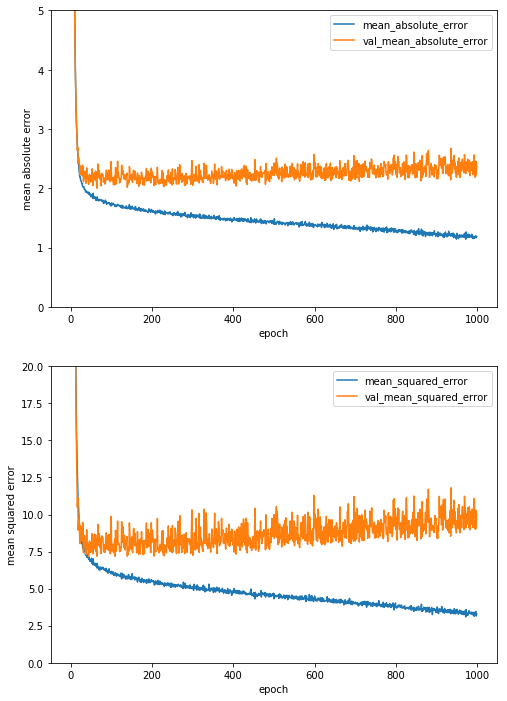

In [28]:
plot_history_error()

## 测试集评估

In [29]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=1)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 [==============================] - 0s 77us/step
Testing set Mean Abs Error:  1.86 MPG


## 预测

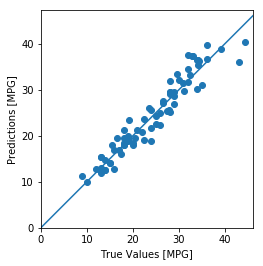

In [30]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

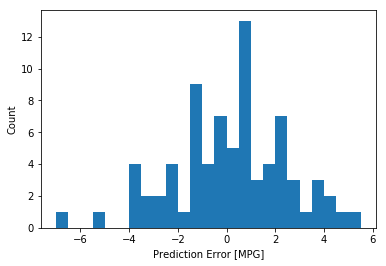

In [31]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")